# **Diagnosis Of PCOS Using Machine Learning**


Niharika Padmanabhan

AM.EN.U4CSE19338



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn import preprocessing as ps
from sklearn import metrics
from sklearn.model_selection import RepeatedKFold , StratifiedKFold
from sklearn.preprocessing import StandardScaler as sc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [ ]:
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

# ***LOADING DATA***

In [ ]:
infertility = pd.read_csv('/content/PCOS_infertility (4).csv')
without = pd.read_excel('/content/data without infertility _final (4) (1).xlsx')


# ***Data Pre-processing***

In [ ]:
infertility.head()

,Sl No,Patient File No,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26


In [ ]:
without.head()

,Sl No,Patient File No,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marriage Status (Yrs),Pregnant(Y/N),No of aborptions,FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist/Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg Exercise(Y/N),BP Systolic (mmHg),BP Diastolic (mmHg),Follicle No (L),Follicle No (R),Avg F size (L) (mm),Avg F size (R) (mm),Insulin levels (IU/ml),Endometrium (mm)
0,1,10001,0,28,44.6,152.0,19.300000,15,78,22,10.48,2,5,7.0,0,0,7.95,3.68,2.160326,36,30,0.833333,0.68,2.07,45.16,17.1,0.57,92.0,0,0,0,0,0,1,0,110,80,3,3,18.0,18.0,7,8.5
1,2,10002,0,36,65.0,161.5,24.921163,15,74,20,11.70,2,5,11.0,1,0,6.73,1.09,6.174312,38,32,0.842105,3.16,1.53,20.09,61.3,0.97,92.0,0,0,0,0,0,0,0,120,70,3,5,15.0,14.0,10,3.7
2,3,10003,1,33,68.8,165.0,25.270891,11,72,18,11.80,2,5,10.0,1,0,5.54,0.88,6.295455,40,36,0.900000,2.54,6.63,10.52,49.7,0.36,84.0,0,0,0,1,1,1,0,120,80,13,15,18.0,20.0,23,10.0
3,4,10004,0,37,65.0,148.0,29.674945,13,72,20,12.00,2,5,4.0,0,0,8.06,2.36,3.415254,42,36,0.857143,16.41,1.22,36.90,33.4,0.36,76.0,0,0,0,0,0,0,0,120,70,2,2,15.0,14.0,10,7.5
4,5,10005,0,25,52.0,161.0,20.060954,11,72,18,10.00,2,5,1.0,1,0,3.98,0.90,4.422222,37,30,0.810811,3.57,2.26,30.09,43.8,0.38,84.0,0,0,0,1,0,0,0,120,80,3,4,16.0,14.0,14,7.0


In [ ]:
without.columns

Index(['Sl No', 'Patient File No', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm)', 'BMI', 'Blood Group', 'Pulse rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marriage Status (Yrs)', 'Pregnant(Y/N)', 'No of aborptions',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)',
       'Waist/Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg Exercise(Y/N)',
       'BP Systolic (mmHg)', 'BP Diastolic (mmHg)', 'Follicle No (L)',
       'Follicle No (R)', 'Avg F size (L) (mm)', 'Avg F size (R) (mm)',
       'Insulin levels (IU/ml)', 'Endometrium (mm)'],
      dtype='object')

In [ ]:
infertility.columns

Index(['Sl No', 'Patient File No', 'PCOS (Y/N)', '  I beta-HCG(mIU/mL)',
       'II beta-HCG(mIU/mL)', 'AMH(ng/mL)'],
      dtype='object')

In [ ]:
data = pd.merge(without,infertility, on='Patient File No', suffixes={'','_without'},how='left')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing 'suffixes' as a <class 'set'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  """Entry point for launching an IPython kernel.


In [ ]:
data.head()

,Sl No,Patient File No,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marriage Status (Yrs),Pregnant(Y/N),No of aborptions,FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist/Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg Exercise(Y/N),BP Systolic (mmHg),BP Diastolic (mmHg),Follicle No (L),Follicle No (R),Avg F size (L) (mm),Avg F size (R) (mm),Insulin levels (IU/ml),Endometrium (mm),Sl No_without,PCOS (Y/N)_without,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)_without
0,1,10001,0,28,44.6,152.0,19.300000,15,78,22,10.48,2,5,7.0,0,0,7.95,3.68,2.160326,36,30,0.833333,0.68,2.07,45.16,17.1,0.57,92.0,0,0,0,0,0,1,0,110,80,3,3,18.0,18.0,7,8.5,1,0,1.99,1.99,2.07
1,2,10002,0,36,65.0,161.5,24.921163,15,74,20,11.70,2,5,11.0,1,0,6.73,1.09,6.174312,38,32,0.842105,3.16,1.53,20.09,61.3,0.97,92.0,0,0,0,0,0,0,0,120,70,3,5,15.0,14.0,10,3.7,2,0,60.80,1.99,1.53
2,3,10003,1,33,68.8,165.0,25.270891,11,72,18,11.80,2,5,10.0,1,0,5.54,0.88,6.295455,40,36,0.900000,2.54,6.63,10.52,49.7,0.36,84.0,0,0,0,1,1,1,0,120,80,13,15,18.0,20.0,23,10.0,3,1,494.08,494.08,6.63
3,4,10004,0,37,65.0,148.0,29.674945,13,72,20,12.00,2,5,4.0,0,0,8.06,2.36,3.415254,42,36,0.857143,16.41,1.22,36.90,33.4,0.36,76.0,0,0,0,0,0,0,0,120,70,2,2,15.0,14.0,10,7.5,4,0,1.99,1.99,1.22
4,5,10005,0,25,52.0,161.0,20.060954,11,72,18,10.00,2,5,1.0,1,0,3.98,0.90,4.422222,37,30,0.810811,3.57,2.26,30.09,43.8,0.38,84.0,0,0,0,1,0,0,0,120,80,3,4,16.0,14.0,14,7.0,5,0,801.45,801.45,2.26


In [ ]:
data.shape

(541, 48)

In [ ]:
data =data.drop(['FSH/LH', 'Sl No_without', 'PCOS (Y/N)_without', 'AMH(ng/mL)_without'], axis=1)

In [ ]:
data = data.rename(columns = {"PCOS (Y/N)":"Target"})

In [ ]:
data.head()

,Sl No,Patient File No,Target,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marriage Status (Yrs),Pregnant(Y/N),No of aborptions,FSH(mIU/mL),LH(mIU/mL),Hip(inch),Waist(inch),Waist/Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg Exercise(Y/N),BP Systolic (mmHg),BP Diastolic (mmHg),Follicle No (L),Follicle No (R),Avg F size (L) (mm),Avg F size (R) (mm),Insulin levels (IU/ml),Endometrium (mm),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL)
0,1,10001,0,28,44.6,152.0,19.300000,15,78,22,10.48,2,5,7.0,0,0,7.95,3.68,36,30,0.833333,0.68,2.07,45.16,17.1,0.57,92.0,0,0,0,0,0,1,0,110,80,3,3,18.0,18.0,7,8.5,1.99,1.99
1,2,10002,0,36,65.0,161.5,24.921163,15,74,20,11.70,2,5,11.0,1,0,6.73,1.09,38,32,0.842105,3.16,1.53,20.09,61.3,0.97,92.0,0,0,0,0,0,0,0,120,70,3,5,15.0,14.0,10,3.7,60.80,1.99
2,3,10003,1,33,68.8,165.0,25.270891,11,72,18,11.80,2,5,10.0,1,0,5.54,0.88,40,36,0.900000,2.54,6.63,10.52,49.7,0.36,84.0,0,0,0,1,1,1,0,120,80,13,15,18.0,20.0,23,10.0,494.08,494.08
3,4,10004,0,37,65.0,148.0,29.674945,13,72,20,12.00,2,5,4.0,0,0,8.06,2.36,42,36,0.857143,16.41,1.22,36.90,33.4,0.36,76.0,0,0,0,0,0,0,0,120,70,2,2,15.0,14.0,10,7.5,1.99,1.99
4,5,10005,0,25,52.0,161.0,20.060954,11,72,18,10.00,2,5,1.0,1,0,3.98,0.90,37,30,0.810811,3.57,2.26,30.09,43.8,0.38,84.0,0,0,0,1,0,0,0,120,80,3,4,16.0,14.0,14,7.0,801.45,801.45


In [ ]:
data.columns

Index(['Sl No', 'Patient File No', 'Target', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm)', 'BMI', 'Blood Group', 'Pulse rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marriage Status (Yrs)', 'Pregnant(Y/N)', 'No of aborptions',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'Hip(inch)', 'Waist(inch)',
       'Waist/Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg Exercise(Y/N)',
       'BP Systolic (mmHg)', 'BP Diastolic (mmHg)', 'Follicle No (L)',
       'Follicle No (R)', 'Avg F size (L) (mm)', 'Avg F size (R) (mm)',
       'Insulin levels (IU/ml)', 'Endometrium (mm)', '  I beta-HCG(mIU/mL)',
       'II beta-HCG(mIU/mL)'],
      dtype='object')

In [ ]:
#To remove whitespaces at both ends from a column name

data.columns = data.columns.str.strip()

In [ ]:
data.columns

Index(['Sl No', 'Patient File No', 'Target', 'Age (yrs)', 'Weight (Kg)',
       'Height(Cm)', 'BMI', 'Blood Group', 'Pulse rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marriage Status (Yrs)', 'Pregnant(Y/N)', 'No of aborptions',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'Hip(inch)', 'Waist(inch)',
       'Waist/Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg Exercise(Y/N)',
       'BP Systolic (mmHg)', 'BP Diastolic (mmHg)', 'Follicle No (L)',
       'Follicle No (R)', 'Avg F size (L) (mm)', 'Avg F size (R) (mm)',
       'Insulin levels (IU/ml)', 'Endometrium (mm)', 'I beta-HCG(mIU/mL)',
       'II beta-HCG(mIU/mL)'],
      dtype='object')

Removing unwanted columns

In [ ]:
data.drop(['Sl No', 'Patient File No'],axis='columns',inplace=True)

In [ ]:
data.shape

(541, 42)

###*Handling Missing datas*

Searching for columns with missing values

In [ ]:
data.isnull().sum()

Target                    0
Age (yrs)                 0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marriage Status (Yrs)     1
Pregnant(Y/N)             0
No of aborptions          0
FSH(mIU/mL)               0
LH(mIU/mL)                0
Hip(inch)                 0
Waist(inch)               0
Waist/Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           0
Reg Exercise(Y/N)         0
BP Systolic (mmHg)        0
BP Diastolic (mmHg)       0
Follicle No (L)           0
Follicle No (R)     

In [ ]:
# Replacing the missing values in a feature column with the median of the feature

data['Marriage Status (Yrs)'].fillna(data['Marriage Status (Yrs)'].median(), inplace = True)


In [ ]:
data.isnull().sum()

Target                    0
Age (yrs)                 0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marriage Status (Yrs)     0
Pregnant(Y/N)             0
No of aborptions          0
FSH(mIU/mL)               0
LH(mIU/mL)                0
Hip(inch)                 0
Waist(inch)               0
Waist/Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           0
Reg Exercise(Y/N)         0
BP Systolic (mmHg)        0
BP Diastolic (mmHg)       0
Follicle No (L)           0
Follicle No (R)     

In [ ]:
print(data.dtypes)

Target                      int64
Age (yrs)                   int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Marriage Status (Yrs)     float64
Pregnant(Y/N)               int64
No of aborptions            int64
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist/Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                float64
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)                float64
Weight gain(Y/N)            int64
hair growth(Y/N)            int64
Skin darkening (Y/N)        int64
Hair loss(Y/N)              int64
Pimples(Y/N)  

###*Standardization*

In [ ]:
scaler = ps.StandardScaler()
sc_data = scaler.fit_transform(data)
st_data = pd.DataFrame(sc_data,columns = data.columns)

In [ ]:
st_data.head()

,Target,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marriage Status (Yrs),Pregnant(Y/N),No of aborptions,FSH(mIU/mL),LH(mIU/mL),Hip(inch),Waist(inch),Waist/Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg Exercise(Y/N),BP Systolic (mmHg),BP Diastolic (mmHg),Follicle No (L),Follicle No (R),Avg F size (L) (mm),Avg F size (R) (mm),Insulin levels (IU/ml),Endometrium (mm),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL)
0,-0.697326,-0.634606,-1.364770,-0.744005,-1.236546,0.651284,1.073680,1.633608,-0.785169,-0.621534,0.039681,-0.141744,-0.784172,-0.416737,-0.030679,-0.032219,-0.502644,-1.068864,-1.265291,-0.613338,-0.600394,1.393269,-0.094875,-0.010760,-0.422597,-0.778037,-0.61367,-0.665332,-0.909782,-0.979870,0.969055,-0.573793,-0.631866,0.551645,-0.740617,-0.821471,0.836776,0.768537,-1.053037,0.011133,-0.198026,-0.147434
1,-0.697326,0.845230,0.486731,0.831983,0.150489,0.651284,0.169968,0.448119,0.623440,-0.621534,0.039681,0.692452,1.275231,-0.416737,-0.036306,-0.062129,0.001865,-0.512314,-1.075762,0.047632,-0.692652,-0.282919,0.032913,0.094356,-0.422597,-0.778037,-0.61367,-0.665332,-0.909782,-0.979870,-1.031933,-0.573793,0.723565,-1.244023,-0.740617,-0.370287,-0.005083,-0.437816,-0.608428,-2.207618,-0.180449,-0.147434
2,1.434049,0.290291,0.831618,1.412610,0.236785,-1.523682,-0.281888,-0.737370,0.738900,-0.621534,0.039681,0.483903,1.275231,-0.416737,-0.041794,-0.064554,0.506374,0.600786,0.175128,-0.117610,0.178669,-0.922773,-0.000624,-0.065946,-0.854047,-0.778037,-0.61367,-0.665332,1.099165,1.020544,0.969055,-0.573793,0.723565,0.551645,1.626032,1.885630,0.836776,1.371714,1.318214,0.704493,-0.050950,0.159673
3,-0.697326,1.030210,0.486731,-1.407579,1.323495,-0.436199,-0.281888,0.448119,0.969819,-0.621534,0.039681,-0.767391,-0.784172,-0.416737,-0.030172,-0.047462,1.010883,0.600786,-0.750856,3.579026,-0.745615,0.841003,-0.047749,-0.065946,-1.285497,-0.778037,-0.61367,-0.665332,-0.909782,-0.979870,-1.031933,-0.573793,0.723565,-1.244023,-0.977282,-1.047063,-0.005083,-0.437816,-0.608428,-0.451107,-0.198026,-0.147434
4,-0.697326,-1.189545,-0.693147,0.749036,-1.048778,-1.523682,-0.281888,-0.737370,-1.339375,-0.621534,0.039681,-1.393038,1.275231,-0.416737,-0.048989,-0.064323,-0.250389,-1.068864,-1.751919,0.156906,-0.567934,0.385684,-0.017682,-0.060690,-0.854047,-0.778037,-0.61367,-0.665332,1.099165,-0.979870,-1.031933,-0.573793,0.723565,0.551645,-0.740617,-0.595879,0.275536,-0.437816,-0.015615,-0.682227,0.040917,0.351498


###*Normalization*

In [ ]:
scaler = ps.MinMaxScaler()
sc_data = scaler.fit_transform(data)
nt_data = pd.DataFrame(sc_data,columns = data.columns)

In [ ]:
nt_data.head()

,Target,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marriage Status (Yrs),Pregnant(Y/N),No of aborptions,FSH(mIU/mL),LH(mIU/mL),Hip(inch),Waist(inch),Waist/Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg Exercise(Y/N),BP Systolic (mmHg),BP Diastolic (mmHg),Follicle No (L),Follicle No (R),Avg F size (L) (mm),Avg F size (R) (mm),Insulin levels (IU/ml),Endometrium (mm),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL)
0,0.0,0.285714,0.176623,0.348837,0.259878,0.571429,0.942029,0.500000,0.314286,0.0,0.416667,0.233333,0.0,0.0,0.001532,0.001814,0.454545,0.260870,0.347826,0.009852,0.029894,0.350125,0.002843,0.006156,0.110345,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.765625,0.782609,0.136364,0.15,0.750000,0.750000,0.206897,0.472222,0.000021,0.000075
1,0.0,0.571429,0.441558,0.569767,0.472141,0.571429,0.884058,0.333333,0.507937,0.0,0.416667,0.366667,1.0,0.0,0.001291,0.000530,0.545455,0.347826,0.387055,0.048030,0.021700,0.154021,0.010192,0.010865,0.110345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.843750,0.673913,0.136364,0.25,0.625000,0.583333,0.310345,0.205556,0.001833,0.000075
2,1.0,0.464286,0.490909,0.651163,0.485347,0.000000,0.855072,0.166667,0.523810,0.0,0.416667,0.333333,1.0,0.0,0.001055,0.000426,0.636364,0.521739,0.645963,0.038485,0.099090,0.079161,0.008263,0.003684,0.082759,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.843750,0.782609,0.590909,0.75,0.750000,0.833333,0.758621,0.555556,0.015181,0.019759
3,0.0,0.607143,0.441558,0.255814,0.651650,0.285714,0.855072,0.333333,0.555556,0.0,0.416667,0.133333,0.0,0.0,0.001554,0.001160,0.727273,0.521739,0.454303,0.252001,0.016995,0.285513,0.005553,0.003684,0.055172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.843750,0.673913,0.090909,0.10,0.625000,0.583333,0.310345,0.416667,0.000021,0.000075
4,0.0,0.178571,0.272727,0.558140,0.288613,0.000000,0.855072,0.166667,0.238095,0.0,0.416667,0.033333,1.0,0.0,0.000746,0.000436,0.500000,0.260870,0.247104,0.054341,0.032777,0.232243,0.007282,0.003920,0.082759,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.843750,0.782609,0.136364,0.20,0.666667,0.583333,0.448276,0.388889,0.024651,0.032054


#**Data Summarization**

In [ ]:
data.shape

(541, 42)

In [ ]:
data.dtypes

Target                      int64
Age (yrs)                   int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Marriage Status (Yrs)     float64
Pregnant(Y/N)               int64
No of aborptions            int64
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist/Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                float64
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)                float64
Weight gain(Y/N)            int64
hair growth(Y/N)            int64
Skin darkening (Y/N)        int64
Hair loss(Y/N)              int64
Pimples(Y/N)  

In [ ]:
data.describe()

,Target,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marriage Status (Yrs),Pregnant(Y/N),No of aborptions,FSH(mIU/mL),LH(mIU/mL),Hip(inch),Waist(inch),Waist/Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg Exercise(Y/N),BP Systolic (mmHg),BP Diastolic (mmHg),Follicle No (L),Follicle No (R),Avg F size (L) (mm),Avg F size (R) (mm),Insulin levels (IU/ml),Endometrium (mm),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.00000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,11.160037,2.560074,4.94085,7.679667,0.380776,0.288355,14.601832,6.469919,37.992606,33.841035,0.891895,2.981281,5.584220,24.321497,49.915874,0.610945,99.835860,0.377079,0.273567,0.306839,0.452865,0.489834,0.515712,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,14.105360,8.475915,664.549235,238.229518
std,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,0.866904,0.901950,1.49202,4.799475,0.486027,0.692575,217.022081,86.673255,3.967920,3.596894,0.046326,3.755532,5.858602,14.970391,346.206599,3.808853,18.559298,0.485104,0.446202,0.461609,0.498234,0.500359,0.500216,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,6.753736,2.165381,3348.920576,1603.826221
min,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,8.500000,2.000000,0.00000,0.000000,0.000000,0.000000,0.210000,0.020000,26.000000,24.000000,0.755556,0.040000,0.100000,0.400000,0.000000,0.047000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.300000,0.110417
25%,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,10.500000,2.000000,4.00000,4.000000,0.000000,0.000000,3.300000,1.020000,36.000000,32.000000,0.857143,1.480000,2.000000,14.520000,20.800000,0.250000,92.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,8.000000,7.000000,1.990000,1.990000
50%,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,11.000000,2.000000,5.00000,7.000000,0.000000,0.000000,4.850000,2.300000,38.000000,34.000000,0.894737,2.260000,3.700000,21.920000,25.900000,0.320000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,13.000000,8.500000,20.000000,1.990000
75%,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,11.700000,4.000000,5.00000,10.000000,1.000000,0.000000,6.410000,3.680000,40.000000,36.000000,0.928571,3.570000,6.860000,29.890000,34.500000,0.450000,107.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,21.000000,9.800000,297.210000,97.630000
max,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,12.00000,30.000000,1.000000,5.000000,5052.000000,2018.000000,48.000000,47.000000,0.979167,65.000000,66.000000,128.240000,6014.660000,85.000000,350.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,30.000000,18.000000,32460.970000,25000.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Target                  541 non-null    int64  
 1   Age (yrs)               541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     541 non-null    float64
 5   Blood Group             541 non-null    int64  
 6   Pulse rate(bpm)         541 non-null    int64  
 7   RR (breaths/min)        541 non-null    int64  
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    int64  
 10  Cycle length(days)      541 non-null    int64  
 11  Marriage Status (Yrs)   541 non-null    float64
 12  Pregnant(Y/N)           541 non-null    int64  
 13  No of aborptions        541 non-null    int64  
 14  FSH(mIU/mL)             541 non-null    fl

In [ ]:
data['Target'].value_counts()

0    364
1    177
Name: Target, dtype: int64

In [ ]:
data.to_csv("data_cleaned.csv")

# **Data Visualization**

In [ ]:
colors = ['#7ecc49','#ff4000']

In [ ]:
def bar_plot(variable):

    # Get feature
    var = data[variable]
    # Count number of categorical variable(value/sample)
    varValue = var.value_counts()
    # Visualize
    plt.figure(figsize = (10,3))
    plt.bar(varValue.index,varValue,color=colors)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Count")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

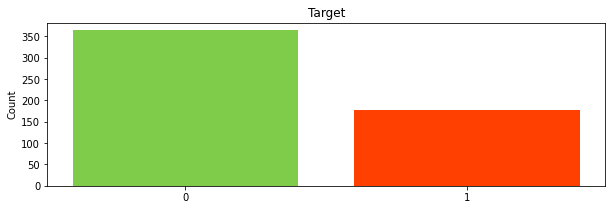

Target: 
 0    364
1    177
Name: Target, dtype: int64


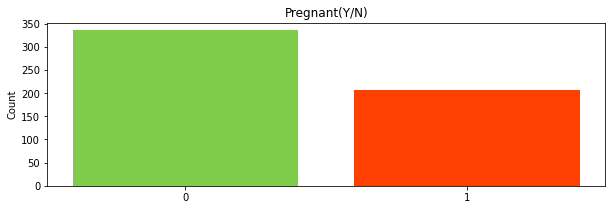

Pregnant(Y/N): 
 0    335
1    206
Name: Pregnant(Y/N), dtype: int64


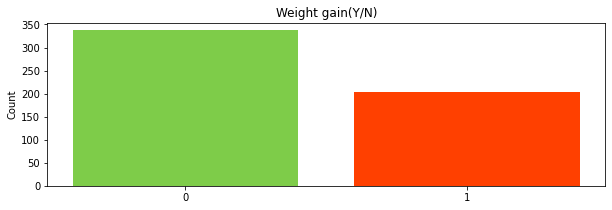

Weight gain(Y/N): 
 0    337
1    204
Name: Weight gain(Y/N), dtype: int64


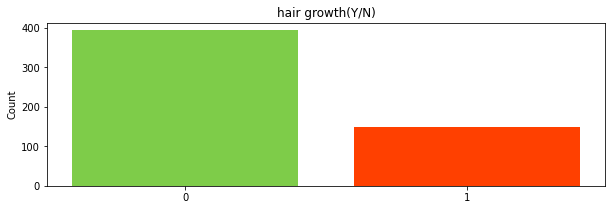

hair growth(Y/N): 
 0    393
1    148
Name: hair growth(Y/N), dtype: int64


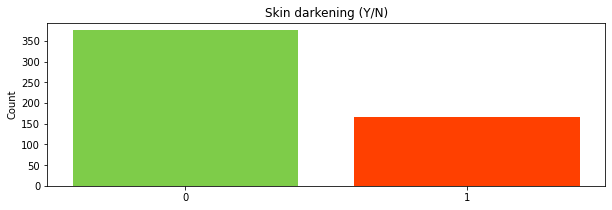

Skin darkening (Y/N): 
 0    375
1    166
Name: Skin darkening (Y/N), dtype: int64


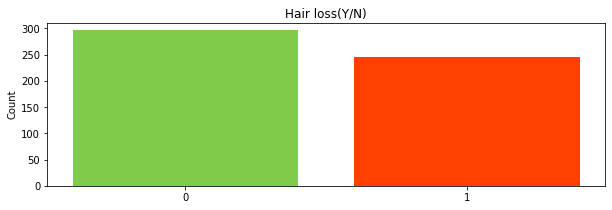

Hair loss(Y/N): 
 0    296
1    245
Name: Hair loss(Y/N), dtype: int64


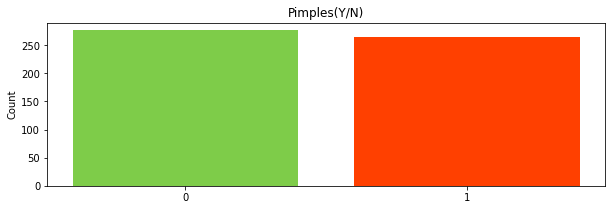

Pimples(Y/N): 
 0    276
1    265
Name: Pimples(Y/N), dtype: int64


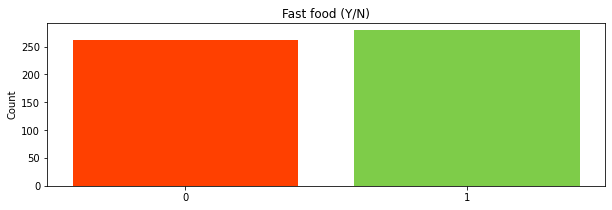

Fast food (Y/N): 
 1    279
0    262
Name: Fast food (Y/N), dtype: int64


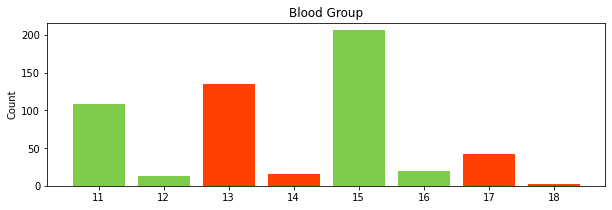

Blood Group: 
 15    206
13    135
11    108
17     42
16     19
14     16
12     13
18      2
Name: Blood Group, dtype: int64


In [ ]:
category = ["Target", "Pregnant(Y/N)", "Weight gain(Y/N)", "hair growth(Y/N)", "Skin darkening (Y/N)", "Hair loss(Y/N)", "Pimples(Y/N)", "Fast food (Y/N)", "Blood Group"]
for c in category:
    bar_plot(c)

In [ ]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(data[variable], bins = 50,color=colors[1])
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

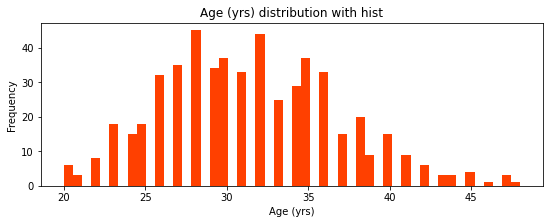

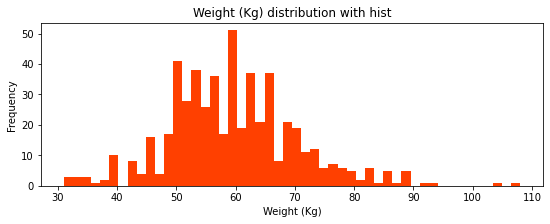

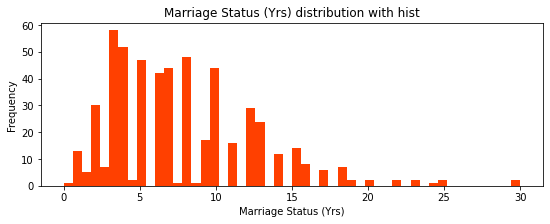

In [ ]:
numericVar = ["Age (yrs)", "Weight (Kg)","Marriage Status (Yrs)"]
for n in numericVar:
    plot_hist(n)

#**Feature Selection**

Using correlation with heatmap to identify the important features

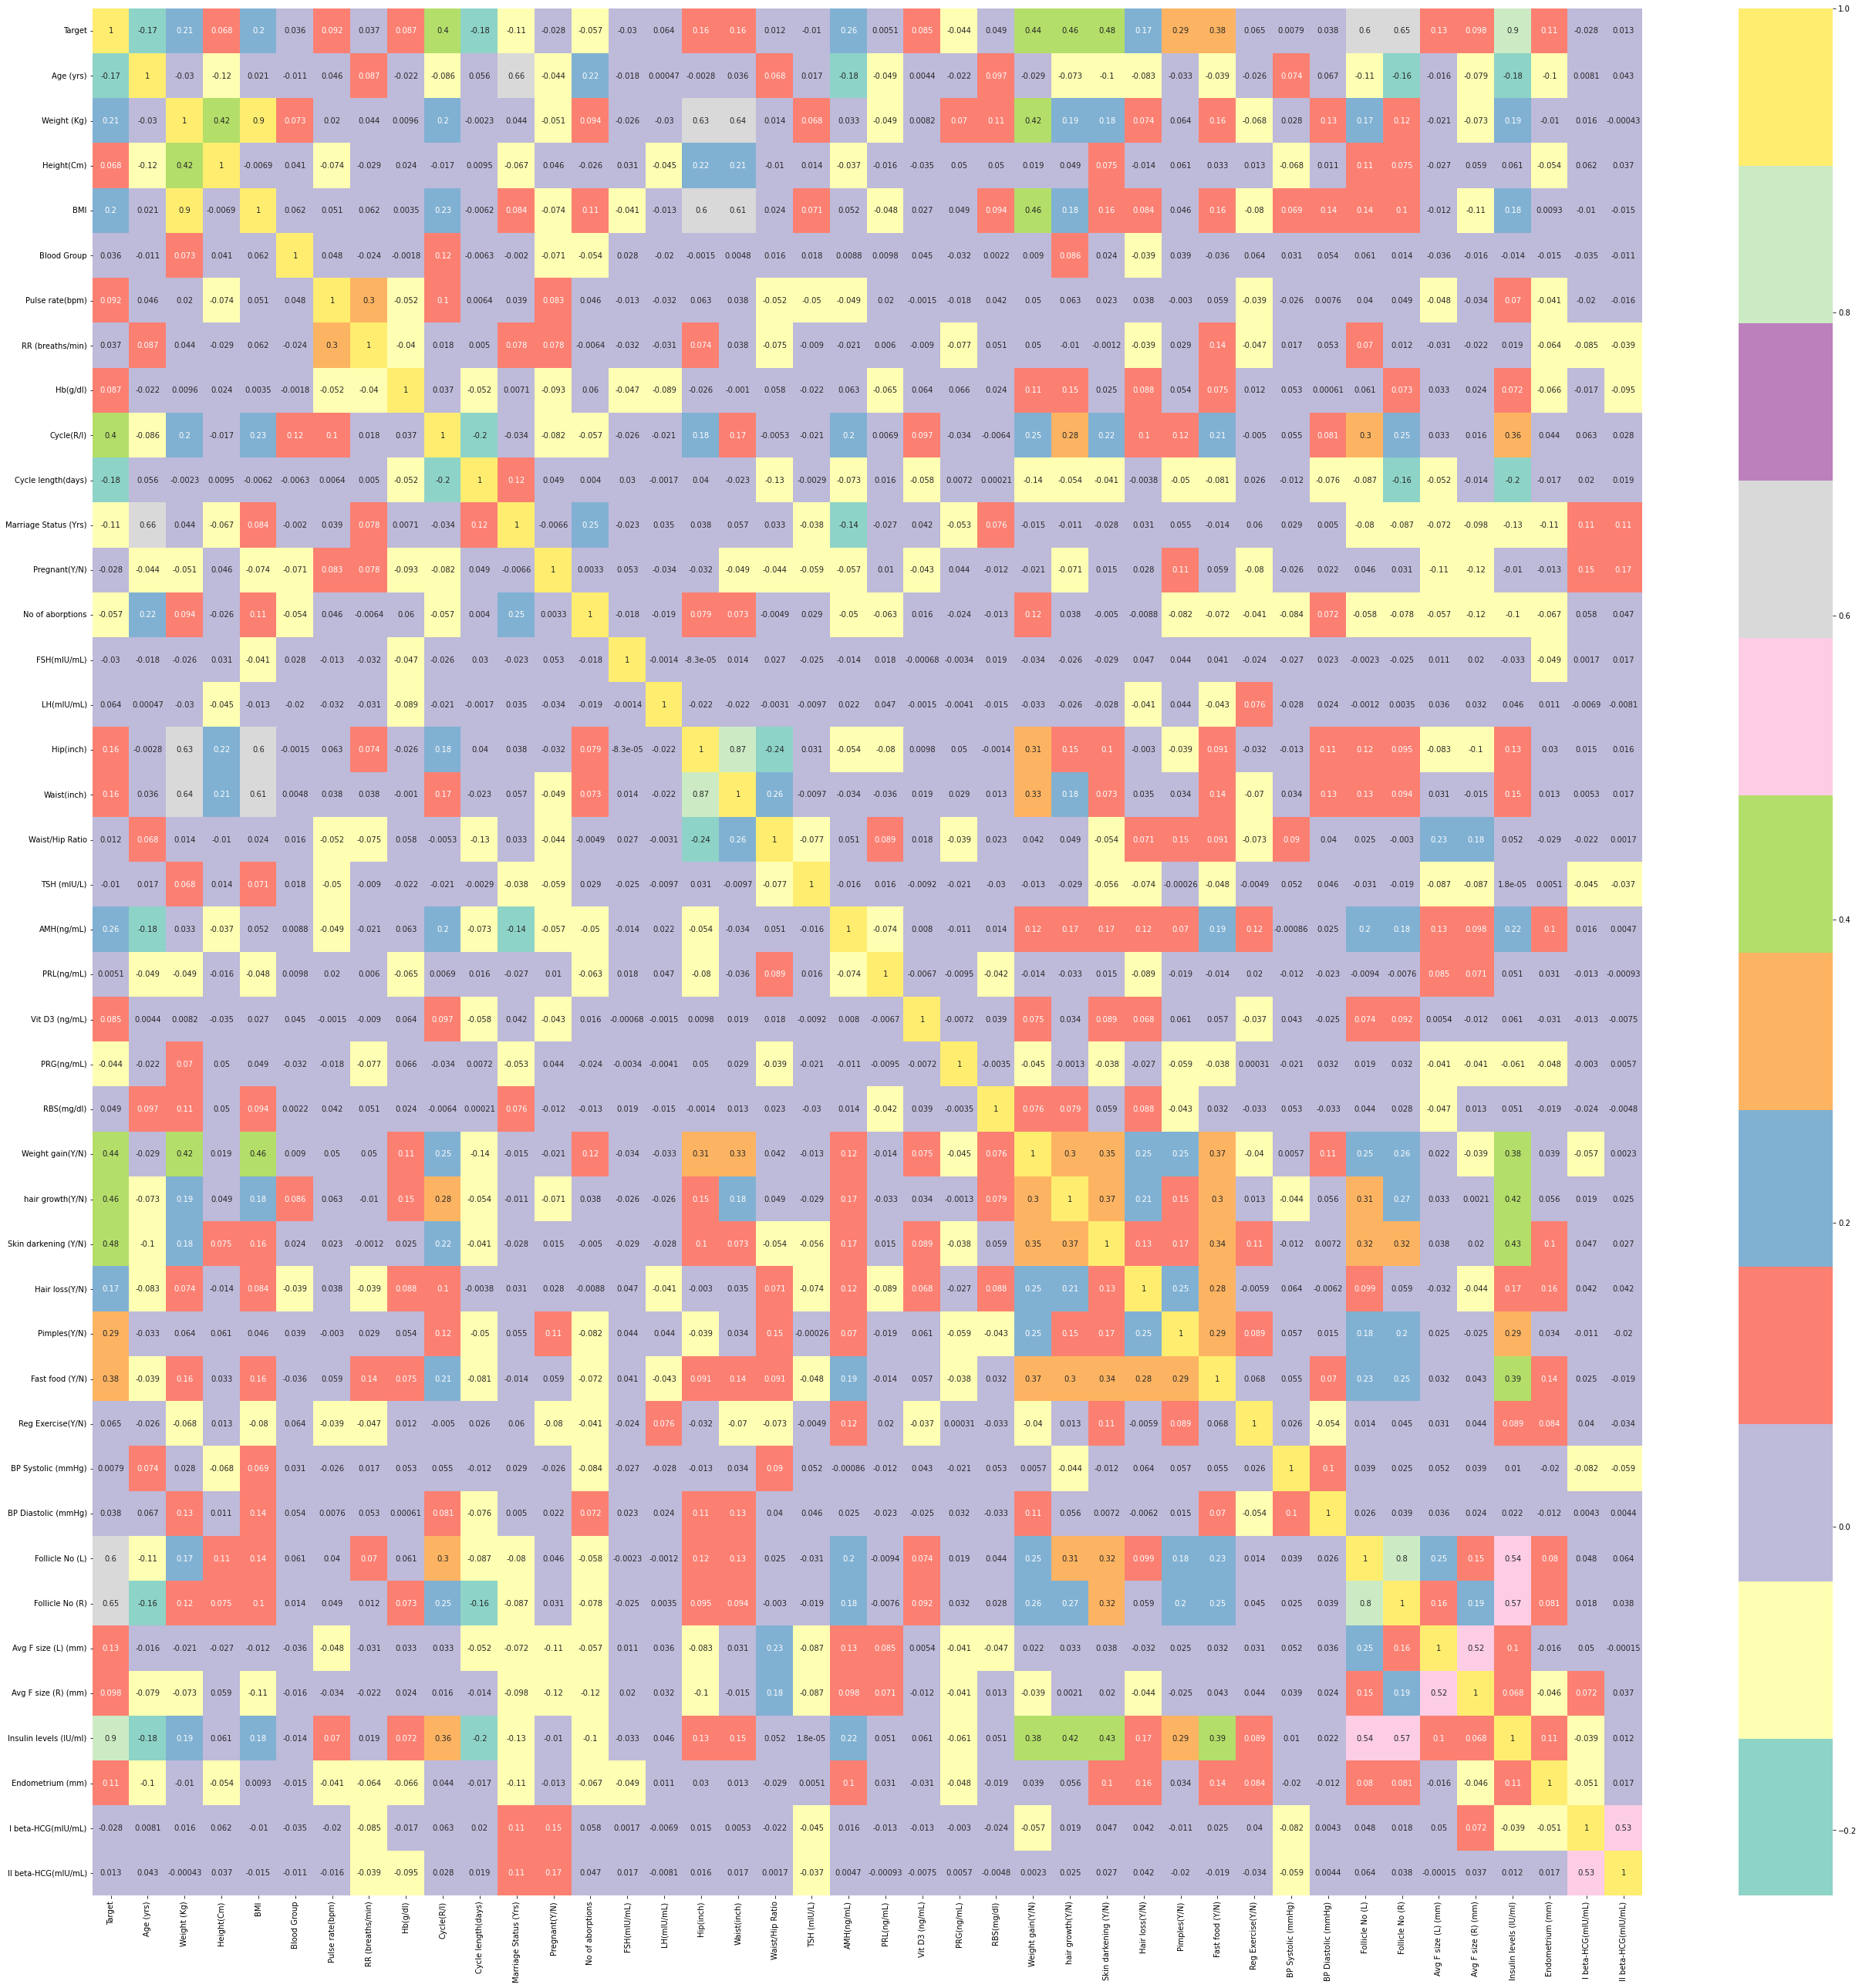

In [ ]:
correlation_mat = nt_data.corr()

#get correlations of each features in dataset
feature_index = correlation_mat.index
plt.figure(figsize = (45,45))

#plot heat map
plot_heatmap = sns.heatmap(nt_data[feature_index].corr(),annot=True,cmap="Set3")


In [ ]:
correlation_mat['Target'].sort_values(ascending=False)

Target                    1.000000
Insulin levels (IU/ml)    0.895286
Follicle No (R)           0.648327
Follicle No (L)           0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.376183
Pimples(Y/N)              0.286077
AMH(ng/mL)                0.257854
Weight (Kg)               0.211938
BMI                       0.199534
Hair loss(Y/N)            0.172879
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg F size (L) (mm)       0.132992
Endometrium (mm)          0.106648
Avg F size (R) (mm)       0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
Reg Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
RBS(mg/dl)                0.048922
BP Diastolic (mmHg)       0.038032
RR (breaths/min)          0.036928
Blood Group         

Selecting the top 15 features

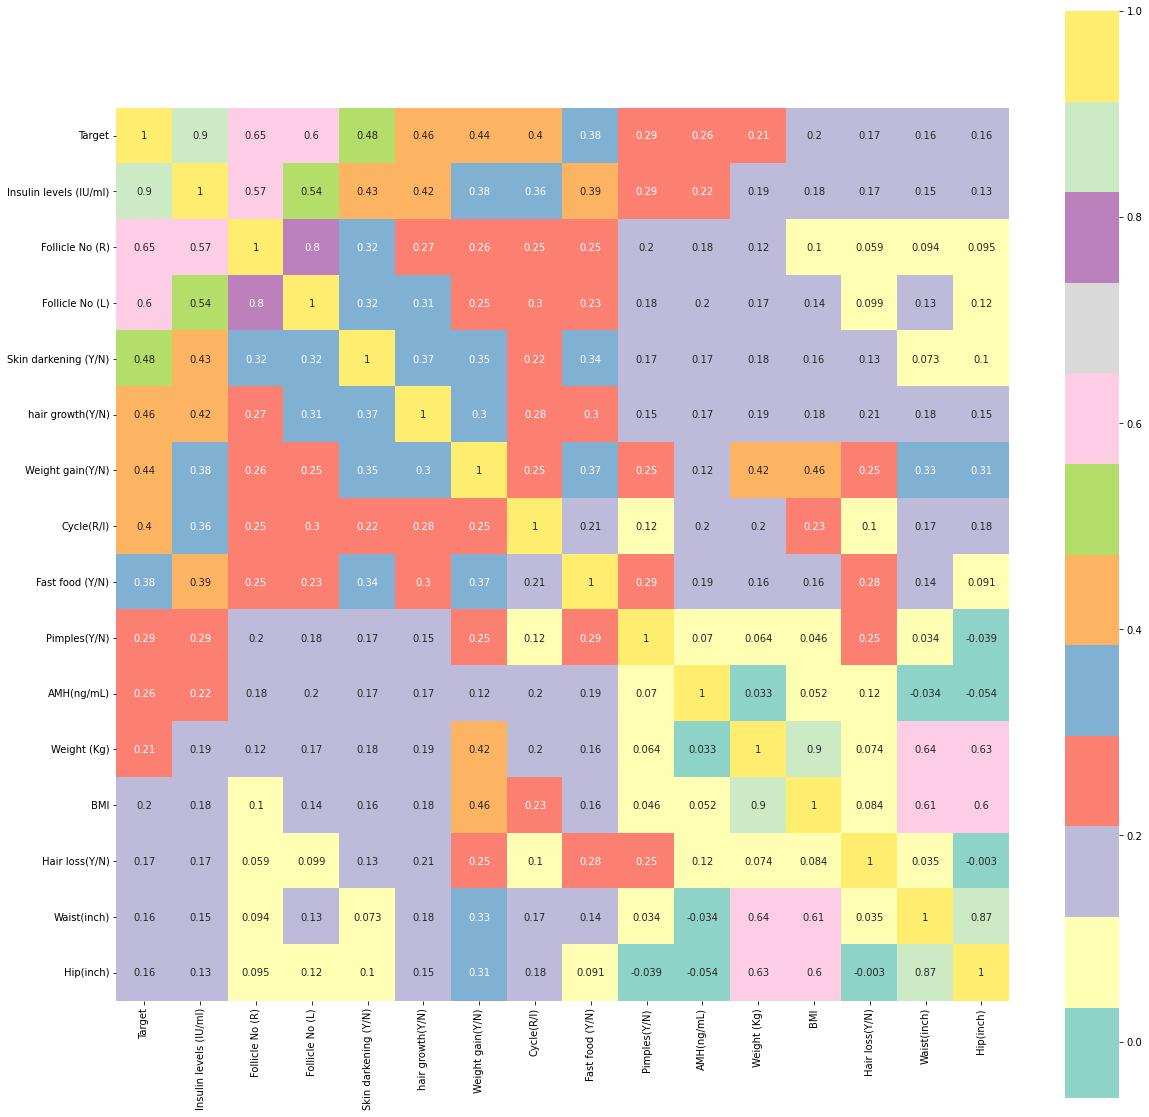

In [ ]:
imp_features = correlation_mat.nlargest(16,'Target')['Target'].index
plt.figure(figsize = (20,20))
plot_heat_map_after = sns.heatmap(nt_data[imp_features].corr(),annot=True,square=True,
                                  cmap="Set3",annot_kws={'size':10})


In [ ]:
correlation_mat.nlargest(16,'Target')['Target']

Target                    1.000000
Insulin levels (IU/ml)    0.895286
Follicle No (R)           0.648327
Follicle No (L)           0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.376183
Pimples(Y/N)              0.286077
AMH(ng/mL)                0.257854
Weight (Kg)               0.211938
BMI                       0.199534
Hair loss(Y/N)            0.172879
Waist(inch)               0.164598
Hip(inch)                 0.162297
Name: Target, dtype: float64

In [ ]:
imp_features

Index(['Target', 'Insulin levels (IU/ml)', 'Follicle No (R)',
       'Follicle No (L)', 'Skin darkening (Y/N)', 'hair growth(Y/N)',
       'Weight gain(Y/N)', 'Cycle(R/I)', 'Fast food (Y/N)', 'Pimples(Y/N)',
       'AMH(ng/mL)', 'Weight (Kg)', 'BMI', 'Hair loss(Y/N)', 'Waist(inch)',
       'Hip(inch)'],
      dtype='object')

In [ ]:
fs_data = nt_data[imp_features]

In [ ]:
fs_data.head()


,Target,Insulin levels (IU/ml),Follicle No (R),Follicle No (L),Skin darkening (Y/N),hair growth(Y/N),Weight gain(Y/N),Cycle(R/I),Fast food (Y/N),Pimples(Y/N),AMH(ng/mL),Weight (Kg),BMI,Hair loss(Y/N),Waist(inch),Hip(inch)
0,0.0,0.206897,0.15,0.136364,0.0,0.0,0.0,0.0,1.0,0.0,0.029894,0.176623,0.259878,0.0,0.260870,0.454545
1,0.0,0.310345,0.25,0.136364,0.0,0.0,0.0,0.0,0.0,0.0,0.021700,0.441558,0.472141,0.0,0.347826,0.545455
2,1.0,0.758621,0.75,0.590909,0.0,0.0,0.0,0.0,1.0,1.0,0.099090,0.490909,0.485347,1.0,0.521739,0.636364
3,0.0,0.310345,0.10,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.016995,0.441558,0.651650,0.0,0.521739,0.727273
4,0.0,0.448276,0.20,0.136364,0.0,0.0,0.0,0.0,0.0,0.0,0.032777,0.272727,0.288613,1.0,0.260870,0.500000


#**Model**

##Dataset splitting

Splitting dataset into training, validation, and test sets.

In [ ]:
X = fs_data.iloc[:,1:].values
y = fs_data.iloc[:,0].values

In [ ]:
print(X.shape)
print(y.shape)

(541, 15)
(541,)


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.3,random_state=189)
X_val,X_test,y_val,y_test = train_test_split(X_test, y_test,test_size=0.3,random_state=189)

##Logistic Regression


###Implementation from scratch

In [ ]:
class LR:

    def __init__(self,X,Y):

        self.o=np.ones((X.shape[0],1))
        self.X=np.concatenate((self.o,X),axis=1)
        self.t=np.zeros(self.X.shape[1])
        self.y=Y

    def sigmoid(self,z,t):
        x=np.dot(z,t)
        return(1/(1+np.exp(-x)))

    def loss(self,hyp,Y):
        l=(-Y * np.log(hyp) - (1 - Y) * np.log(1 - hyp)).mean()
        return(l)

    def GD(self,X,hyp,Y):
        l=Y.shape[0]
        return(np.dot(X.T,(hyp-Y))/l)


    #using mini-batch gradient descent algorithm
    def train(self,batch_size,epochs,lr):
        n=self.X.shape[0]
        f=self.X.shape[1]
        loss_l=[]
        b=0

        for i in range(epochs):
            for b in  range(n//batch_size):

                s_i=b*batch_size
                e_i=s_i+(batch_size-1)


                BX = self.X[s_i:e_i]
                BY = self.y[s_i:e_i]

                hyp = self.sigmoid(BX,self.t)

                der = self.GD(BX,hyp,BY)

                self.t = self.t-lr*der #parameter updation happens batch_size*epoch no of times

            los = self.loss(self.sigmoid(self.X,self.t),self.y)
            loss_l.append(los)

        return (self.t,loss_l)

    def predict(self,X,t):
        self.o1=np.ones((X.shape[0],1))
        X=np.concatenate((self.o1,X),axis=1)
        pred=self.sigmoid(X,t)

        class_pred=[]

        class_pred=[1 if p>0.5 else 0 for p in pred]

        return(class_pred)

In [ ]:
ler = [0.001,0.003,0.005,0.01,0.03,0.05]
ler_ac=[]

In [ ]:
for i in ler:

    print('---------------Learning Rate:',i,'-----------')
    print()

    LR_model = LR(X_train,y_train)
    theta,loss = LR_model.train(5,50,i)

    print('****Theta*****')
    print()
    print(theta)
    print()

    y_p = LR_model.predict(X_val,theta)
    ac_lr = sum(y_p == y_val) / y_val.shape[0]

    print(ac_lr*100)
    ler_ac.append((ac_lr*100))
    print('--------------------------------------------------------------')


---------------Learning Rate: 0.001 -----------

****Theta*****

[-0.42264256  0.16205137  0.1048935   0.08109207  0.25459596  0.20761577
  0.18238053  0.12495404  0.07215311  0.0136551   0.0057652  -0.10870015
 -0.14336297 -0.04780903 -0.13855257 -0.17520557]

85.08771929824562
--------------------------------------------------------------
---------------Learning Rate: 0.003 -----------

****Theta*****

[-0.96921605  0.50390458  0.32901319  0.25262042  0.61406423  0.50326138
  0.46049175  0.33592789  0.19114579  0.05929773  0.02247854 -0.23245962
 -0.31214376 -0.09500632 -0.29748604 -0.37441629]

92.10526315789474
--------------------------------------------------------------
---------------Learning Rate: 0.005 -----------

****Theta*****

[-1.36255521  0.81273833  0.52849225  0.40213249  0.82527698  0.67825449
  0.63643559  0.49214465  0.25152861  0.08031369  0.03536228 -0.31603685
 -0.42806264 -0.13635364 -0.40134401 -0.50316746]

91.22807017543859
----------------------------------

In [ ]:
max_acc = max(ler_ac)
max_ler = ler[ler_ac.index(max_acc)]
print(max_acc, max_ler)

95.6140350877193 0.05


Finding the best learning rate

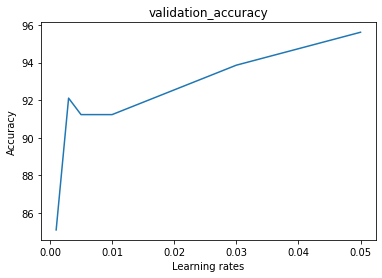

In [ ]:
plt.plot(ler,ler_ac)
plt.xlabel('Learning rates')
plt.ylabel('Accuracy')
plt.title('validation_accuracy')
plt.show()

In [ ]:
#Finding the learning rate for which Accuracy is maximum

max_acc_lr = max(ler_ac)
max_ler = ler[ler_ac.index(max_acc_lr)]
print(max_acc_lr, max_ler)

95.6140350877193 0.05


In [ ]:
LR_model = LR(X_train,y_train)
theta,loss = LR_model.train(5,50,max_ler)

y_p = LR_model.predict(X_test,theta)
ac_lr = sum(y_p == y_test) / y_test.shape[0]
ac_lr = ac_lr*100
print(ac_lr)

97.95918367346938


Loss Vs Iteration graph

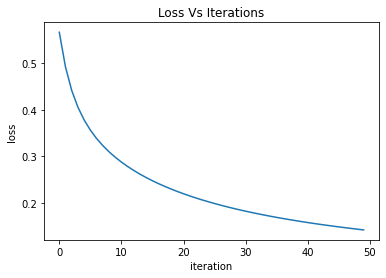

In [ ]:
plt.plot(loss)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('Loss Vs Iterations')
plt.show()

####Analyzation of the model

In [ ]:
print(metrics.classification_report(y_test, y_p))


              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        34
         1.0       1.00      0.93      0.97        15

    accuracy                           0.98        49
   macro avg       0.99      0.97      0.98        49
weighted avg       0.98      0.98      0.98        49



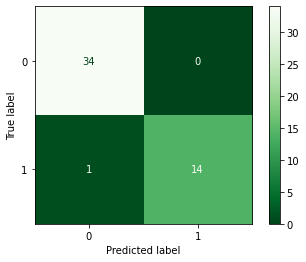

In [ ]:
cm_lr = metrics.confusion_matrix(y_test, y_p)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr,display_labels=['0','1'])
disp.plot(cmap="Greens_r")
plt.show()

###Implemetation using scikit learn

In [ ]:
lr_clf = LogisticRegression(random_state=1, solver='lbfgs',max_iter=2500).fit(X_train, y_train)

In [ ]:
y_pred_LR = lr_clf.predict(X_val)
acc_lr_sci = lr_clf.score(X_val,y_val)*100
print ('Accuracy (LR scikit-learn implementation:)',acc_lr_sci)

Accuracy (LR scikit-learn implementation:) 94.73684210526315


####Analyzation of the model

In [ ]:
print(metrics.classification_report(y_val, y_pred_LR))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96        79
         1.0       0.97      0.86      0.91        35

    accuracy                           0.95       114
   macro avg       0.95      0.92      0.94       114
weighted avg       0.95      0.95      0.95       114



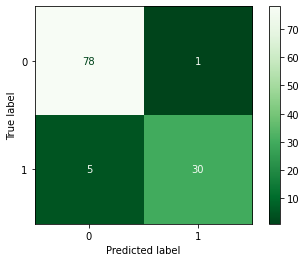

In [ ]:
cm_lr_sci = metrics.confusion_matrix(y_val, y_pred_LR)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_lr_sci, display_labels = ['0','1'])
disp.plot(cmap="Greens_r")
plt.show()

##K Fold cross validation

Evaluating the model using repeated k-fold cross validation

In [ ]:
skf = StratifiedKFold(n_splits=5, random_state=None)
A=[]
for train_index, test_index in skf.split(X,y):

  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  LR_model = LR(X_train,y_train)
  theta,losses = LR_model.train(5,50,max_ler)

  y_p = LR_model.predict(X_test,theta)
  ac_gd = sum(y_p == y_test) / y_test.shape[0]

  A.append((ac_gd*100))

In [ ]:
print('Average accuracy of the model after cross validation: ')
np.mean(A)

Average accuracy of the model after cross validation: 


96.85355079850493

##Decision Tree

In [ ]:
depths = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,110,120,130,140,150,160,170,180,200]
ac=[]

In [ ]:
for i in depths:
  dtree_clf = tree.DecisionTreeClassifier(max_depth=i,min_samples_leaf=40)
  dtree_clf.fit(X_train,y_train)
  y_pred_dtree = dtree_clf.predict(X_val)
  ac.append(accuracy_score(y_val,y_pred_dtree)*100)


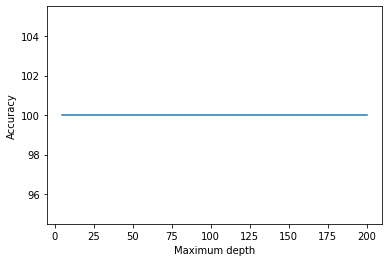

In [ ]:
plt.plot(depths,ac,label='Test_accuracy')
plt.xlabel('Maximum depth')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#Finding the depth for which Accuracy is maximum

max_acc = max(ac)
max_dt = depths[ac.index(max_acc)]
print(max_acc, max_dt)

100.0 5


In [ ]:
#Using the depth which gave the maximum a15,ccuracy to train the model
dtree_clf = tree.DecisionTreeClassifier(max_depth=max_dt,min_samples_leaf=4)
dtree_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4)

In [ ]:
y_pred_dtree = dtree_clf.predict(X_val)

In [ ]:
acc_dtree = accuracy_score(y_val,y_pred_dtree)*100
print(acc_dtree)

100.0


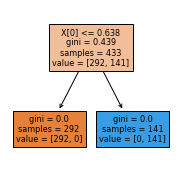

In [ ]:
fig = plt.figure(figsize=(3,3))
dtree_plot = tree.plot_tree(dtree_clf,filled=True)

####Analyzation of the model

In [ ]:
print(metrics.classification_report(y_val, y_pred_dtree))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        79
         1.0       1.00      1.00      1.00        35

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



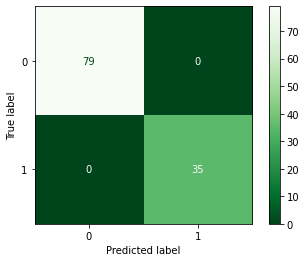

In [ ]:
cm_dree = metrics.confusion_matrix(y_val, y_pred_dtree)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_dree, display_labels = ['0','1'])
disp.plot(cmap="Greens_r")
plt.show()

##SVM

In [ ]:
S = SVC(kernel = 'linear')
S.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred_svm = S.predict(X_val)

In [ ]:
acc_svm = accuracy_score(y_val,y_pred_svm)*100
print(acc_svm)

98.24561403508771


In [ ]:
print(metrics.classification_report(y_val, y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        79
         1.0       1.00      0.94      0.97        35

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



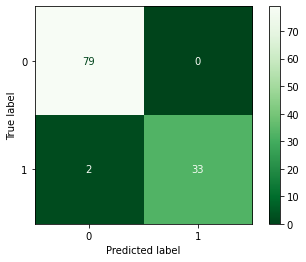

In [ ]:
cm_svm = metrics.confusion_matrix(y_val, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = ['0','1'])
disp.plot(cmap="Greens_r")
plt.show()

##Naive Bayes classifier

In [ ]:
gnb = GaussianNB()
y_pred_nb = gnb.fit(X_train, y_train).predict(X_val)

In [ ]:
acc_nb = accuracy_score(y_val,y_pred_nb)*100
print(acc_nb)

99.12280701754386


In [ ]:
print(metrics.classification_report(y_val, y_pred_nb))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        79
         1.0       1.00      0.97      0.99        35

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



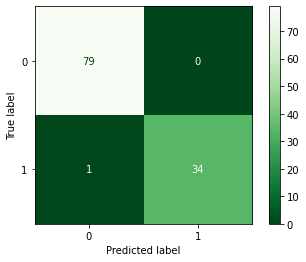

In [ ]:
cm_nb = metrics.confusion_matrix(y_val, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_nb, display_labels = ['0','1'])
disp.plot(cmap="Greens_r")
plt.show()

##KNN

In [ ]:
knn = [3,5,7,9,15,21,25,31,35,41,45,51]
ac_knn=[]

In [ ]:
for l in knn:
  print('-----k =',l,'------')
  k = KNeighborsClassifier(n_neighbors=l)
  k.fit(X_train,y_train)

  y_pred_knn = k.predict(X_val)
  acc_knn = accuracy_score(y_val,y_pred_knn)*100
  ac_knn.append(acc_knn)

  print('Accuracy:',acc_knn)
  print()

-----k = 3 ------
Accuracy: 90.35087719298247

-----k = 5 ------
Accuracy: 88.59649122807018

-----k = 7 ------
Accuracy: 89.47368421052632

-----k = 9 ------
Accuracy: 90.35087719298247

-----k = 15 ------
Accuracy: 91.22807017543859

-----k = 21 ------
Accuracy: 90.35087719298247

-----k = 25 ------
Accuracy: 90.35087719298247

-----k = 31 ------
Accuracy: 90.35087719298247

-----k = 35 ------
Accuracy: 90.35087719298247

-----k = 41 ------
Accuracy: 91.22807017543859

-----k = 45 ------
Accuracy: 90.35087719298247

-----k = 51 ------
Accuracy: 90.35087719298247



Finding the best k value

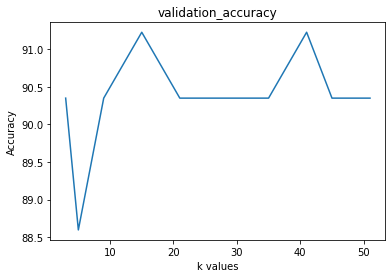

In [ ]:
plt.plot(knn,ac_knn)
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.title('validation_accuracy')
plt.show()

In [ ]:
#Finding the learning rate for which Accuracy is maximum

max_acc = max(ac_knn)
max_knn = knn[ac_knn.index(max_acc)]
print(max_acc, max_knn)

91.22807017543859 15


In [ ]:
k = KNeighborsClassifier(n_neighbors=max_knn)
k.fit(X_train,y_train)

y_pred_knn = k.predict(X_val)

acc_knn = accuracy_score(y_val,y_pred_knn)*100

In [ ]:
print(acc_knn)

91.22807017543859


In [ ]:
print(metrics.classification_report(y_val, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94        79
         1.0       0.93      0.77      0.84        35

    accuracy                           0.91       114
   macro avg       0.92      0.87      0.89       114
weighted avg       0.91      0.91      0.91       114



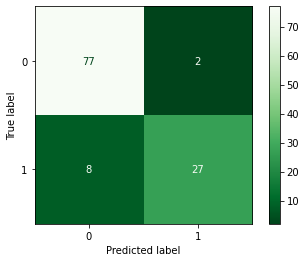

In [ ]:
cm_knn = metrics.confusion_matrix(y_val, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_knn, display_labels = ['0','1'])
disp.plot(cmap="Greens_r")
plt.show()

#**Comparing Different Models**

Using a box plot

In [ ]:
acc_algo = [max_acc_lr,acc_lr_sci,acc_dtree,acc_svm,acc_nb,acc_knn]

In [ ]:
algo = ['LR','LR_sklearn','DTree','SVM',"Naive Baye's",'KNN']

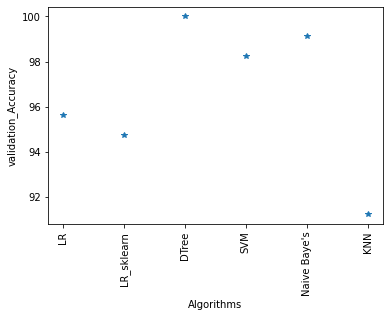

In [ ]:
plt.xlabel('Algorithms')
plt.ylabel('validation_Accuracy')
plt.xticks(rotation='vertical')
plt.plot(algo,acc_algo, '*')
plt.show()